In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
import os

In [3]:
# Cargar datos
data_path = os.path.join(os.getcwd(), "/content/blood-pressure1.txt")
dataset = read_csv(data_path, delim_whitespace=True)

In [4]:
dataset = dataset.drop(['ID', 'One'], axis=1)

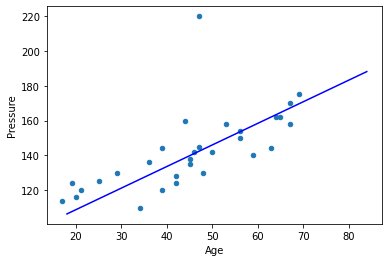

In [7]:
%matplotlib inline
dataset.plot.scatter(x='Age', y='Pressure')

# Ahora, asumiremos que ya sabemos la hipótesis y parece una línea recta 
h = lambda x: 84 + 1.24 * x

# ahora agreguemos esta línea a la gráfica
ages = range(18, 85)
estimated = []

for i in ages:
    estimated.append(h(i))

plt.plot(ages, estimated, 'b');

Por ejemplo, nuestra hipótesis predice que para alguien que tiene 48 años, su presión arterial debería ser de 
h
(
48
)
=
84
+
1.24
∗
48
=
143
m
m
H
g
; sin embargo, en nuestra muestra de entrenamiento, tenemos el valor de 
130
m
m
H
g
. Por lo tanto, el error es 
(
143
−
130
)
2
=
169
. Ahora necesitamos calcular este error en cada entrada en nuestro set de data de entrenamiento

In [6]:
import numpy as np
# Calculemos el costo para la hipótesis de arriba

h = lambda x, theta_0, theta_1: theta_0 + theta_1 * x

def cost(X, y, t0, t1):
    m = len(X) # número de elementos de entrenamiento
    c = np.power(np.subtract(h(X, t0, t1), y), 2) #subtract(dferencia de dos arreglos)
    return (1 / (2 * m)) * sum(c)

X = dataset.values[:, 0]
y = dataset.values[:, 1]
print('J(Theta) = %2.2f' % cost(X, y, 84, 1.24))

J(Theta) = 151.38
